In [1]:
import matplotlib.image as img
import numpy as np
import glob
import os
import nibabel as nib

In [2]:
X_orig = []
X_vec = []
for image_path in glob.glob("./cavum_data/*.nii.gz"):
    img=nib.load(image_path).get_data()
    X_orig.append(img)
    X_vec.append(img.flatten())

In [3]:
len(X_vec),len(X_vec[1])

(861, 75000)

In [4]:
from sklearn import datasets
from pylab import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib notebook
import csv

In [5]:
import pandas as pd
esquimot=pd.read_csv('esquimot_mri.csv')

In [7]:
y_orig=esquimot['Grup']
y_vec = []
for i in range(len(y_orig)):
    y_vec.append(y_orig[i].split('_')[0])
#print y_vec

In [8]:
iris = datasets.load_iris()
col = ['r', 'g', 'b','c','y','k','m','#ff0000']
y=pd.Categorical.from_array(y_vec).codes
y_labels=pd.Categorical.from_array(y_vec).categories
print y_labels
lc = [col[i] for i in y]

Index([u'Control', u'Depressio', u'EQZ', u'FE', u'FEP', u'TBP', u'TEA', u'Tr'], dtype='object')


<IPython.core.display.Javascript object>


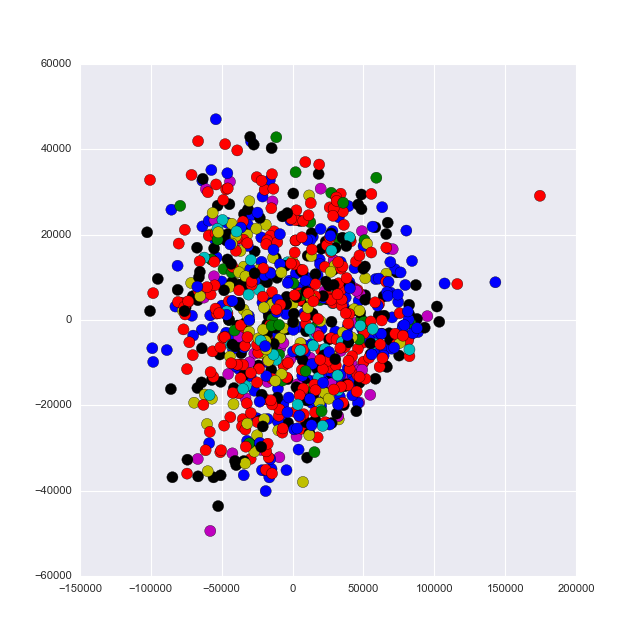

In [9]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
fdata = pca.fit_transform(X_vec)
fig = plt.figure(figsize=(8,8))
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)


In [105]:
print(pca.explained_variance_ratio_)

[  5.32942772e-01   8.29276815e-02   6.24261498e-02   3.59427296e-02
   3.15848701e-02   2.56146938e-02   1.70821678e-02   1.23652499e-02
   1.09157208e-02   9.46956314e-03   8.88473913e-03   7.20360223e-03
   6.93221297e-03   5.86315850e-03   4.59881639e-03   4.30266326e-03
   4.05775430e-03   3.78577551e-03   3.66354291e-03   3.38571263e-03
   3.31946160e-03   3.12178535e-03   2.93666474e-03   2.82153720e-03
   2.68187793e-03   2.58829608e-03   2.47531733e-03   2.26838002e-03
   2.11987970e-03   2.07166700e-03   2.06149672e-03   1.90004823e-03
   1.84124964e-03   1.82284089e-03   1.76224683e-03   1.72373245e-03
   1.69111334e-03   1.50293822e-03   1.45775243e-03   1.39565009e-03
   1.35420845e-03   1.33796234e-03   1.25544041e-03   1.19112059e-03
   1.15591788e-03   1.13199430e-03   1.10904442e-03   1.07586337e-03
   1.04276661e-03   1.01809425e-03   9.87703563e-04   9.70416469e-04
   9.25423461e-04   8.91350501e-04   8.42444308e-04   8.28595366e-04
   8.09538877e-04   8.07448931e-04

In [121]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
feature_selection = SelectKBest(f_classif,k=500)
clf = SVC(kernel='linear')
X_reduced = feature_selection.fit_transform(X_vec,y_vec)

In [ ]:
clf.fit(X_reduced, y_vec)
#look at discriminating weights
coef=clf.coef_
#reverse feature selection
coef = feature_selection.inverse_transfor(coef)

In [ ]:
coef

<IPython.core.display.Javascript object>


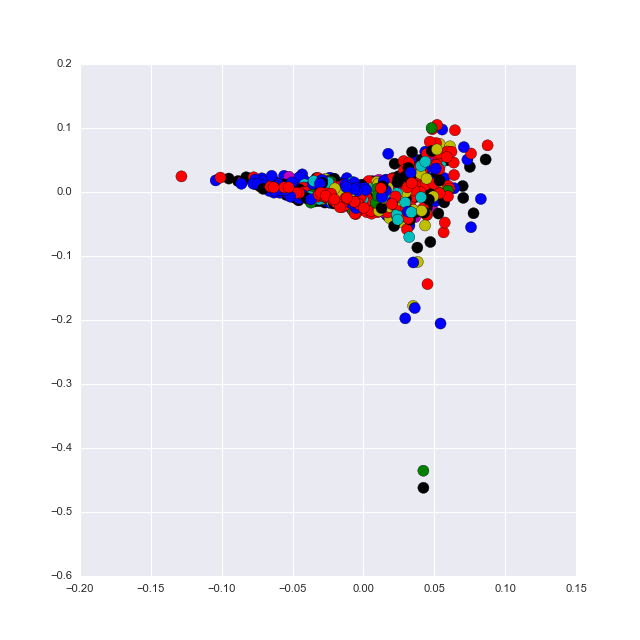

In [104]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors=25, n_components=2, method='standard')
fdata = lle.fit_transform(X_vec)
fig = plt.figure(figsize=(8,8))
plt.scatter(fdata[:, 0], fdata[:, 1], c=lc,s=100)

In [17]:
print (lle.reconstruction_error_)

1.49580320092e-05


<IPython.core.display.Javascript object>


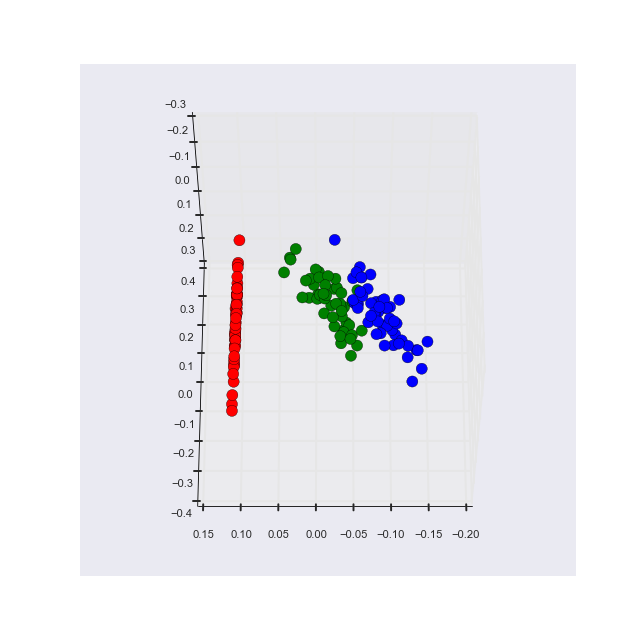

In [18]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_neighbors=25, n_components=3, method='standard')
fdata = lle.fit_transform(iris['data'])
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(240, 90)
plt.scatter(fdata[:, 0], fdata[:, 1], zs=fdata[:, 2], depthshade=False, c=lc,s=100)

In [12]:
# Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2011

print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = np.array(X_vec)
y = y_vec
n_samples, n_features = X.shape
n_neighbors = 30


#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)



#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")


#----------------------------------------------------------------------
# Projection on to the first 2 principal components

print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Projection on to the first 2 linear discriminant components

print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
X_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(X2, y)
plot_embedding(X_lda,
               "Linear Discriminant projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Isomap projection of the digits dataset
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso,
               "Isomap projection of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Locally linear embedding of the digits dataset
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard')
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_lle,
               "Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# Modified Locally linear embedding of the digits dataset
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='modified')
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_mlle,
               "Modified Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# HLLE embedding of the digits dataset
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='hessian')
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_hlle,
               "Hessian Locally Linear Embedding of the digits (time %.2fs)" %
               (time() - t0))


#----------------------------------------------------------------------
# LTSA embedding of the digits dataset
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='ltsa')
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(X_ltsa,
               "Local Tangent Space Alignment of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Random Trees embedding of the digits dataset
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced,
               "Random forest embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# Spectral embedding of the digits dataset
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver="arpack")
t0 = time()
X_se = embedder.fit_transform(X)

plot_embedding(X_se,
               "Spectral embedding of the digits (time %.2fs)" %
               (time() - t0))

#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

plt.show()

Automatically created module for IPython interactive environment
Computing random projection


<IPython.core.display.Javascript object>

TypeError: unsupported operand type(s) for /: 'str' and 'float'